In [37]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
device = "cuda" if torch.cuda.is_available() else "cpu"

## Model Test

In [38]:
class RegressionModel(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.layers = nn.Sequential(nn.Linear(in_features=in_features, out_features=32),
                                    nn.BatchNorm1d(32),
                                    nn.ReLU(),
                                    nn.Linear(in_features=32, out_features=16),
                                    nn.BatchNorm1d(16),
                                    nn.ReLU(),
                                    nn.Linear(in_features=16, out_features=1))
    def forward(self, x):
        return self.layers(x)


In [ ]:
from src.train import ModelTrainer
from src.model import RegressionModel, device
import pandas as pd
import numpy as np

data_path = '../data/insurance.csv'


In [57]:
np_array = np.array([1,2,3,4])
torch_tensor = torch.from_numpy(np_array)
torch_tensor

tensor([1, 2, 3, 4], dtype=torch.int32)

## Data Exploration

In [39]:
df = pd.read_csv(r"E:\Documents\Codes\Python\dockerized NN regressor\data\insurance.csv")
display(df.head(1)), display(df.isnull().sum()), display(df.describe)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

(None, None, None)

In [40]:
df['sex'].value_counts(), df['smoker'].value_counts(), df['region'].value_counts()

(sex
 male      676
 female    662
 Name: count, dtype: int64,
 smoker
 no     1064
 yes     274
 Name: count, dtype: int64,
 region
 southeast    364
 southwest    325
 northwest    325
 northeast    324
 Name: count, dtype: int64)

### Check Distribution

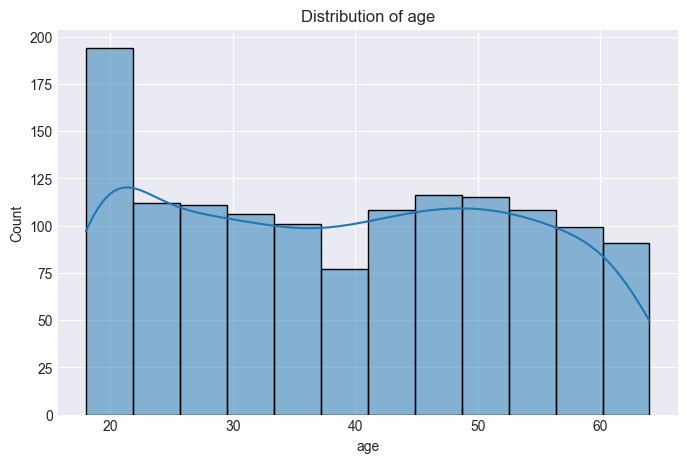

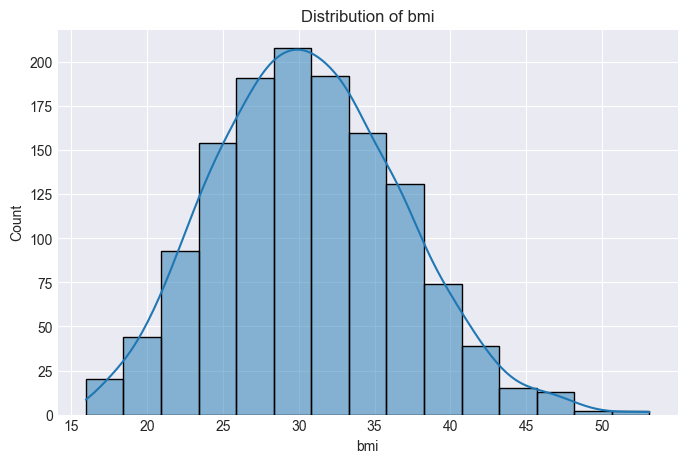

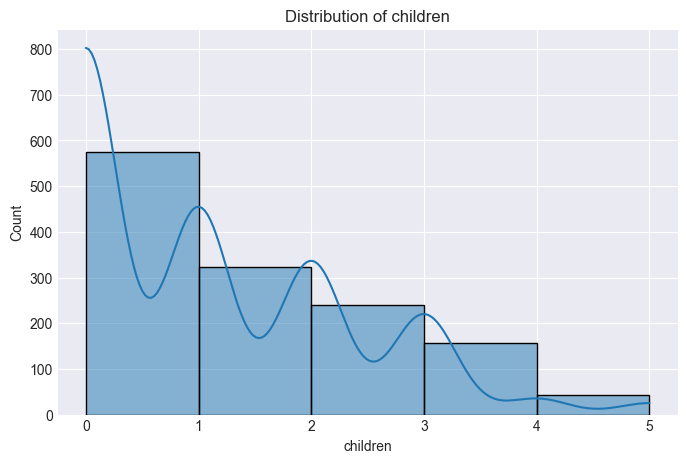

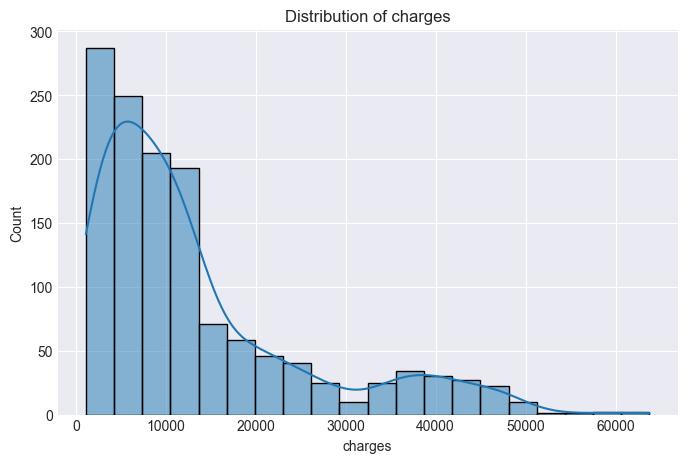

In [41]:
num_columns_dict = {'age' : 12, 'bmi' : 15, 'children' : 5, 'charges' : 20}
for column, bins in num_columns_dict.items():
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, bins=bins, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(f'{column}')
    plt.ylabel("Count")
    plt.show()


### Check for outliers

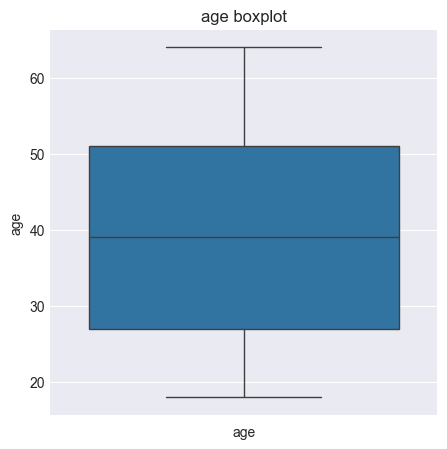

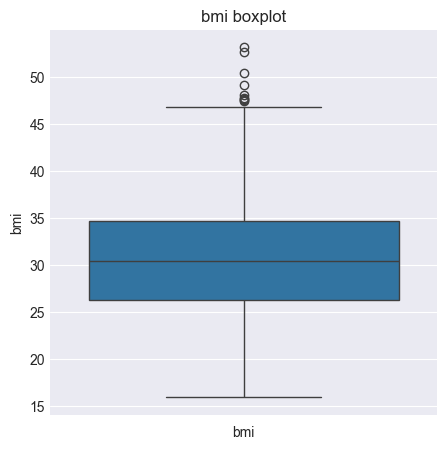

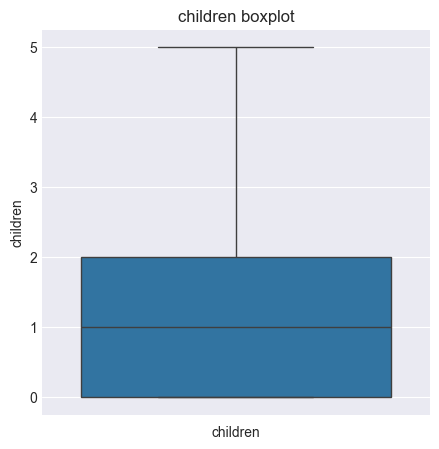

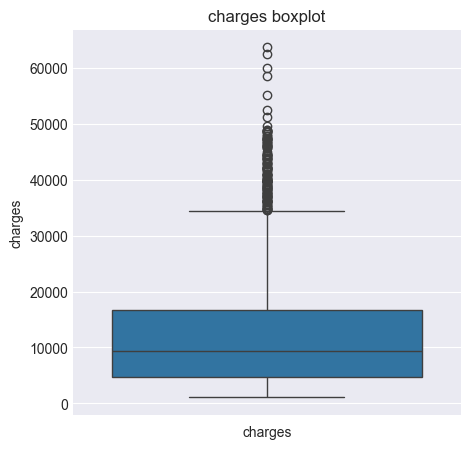

In [47]:
for column in num_columns_dict.keys():
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=df, y=column)
    plt.title(f"{column} boxplot")
    plt.xlabel(f'{column}')
    plt.show()


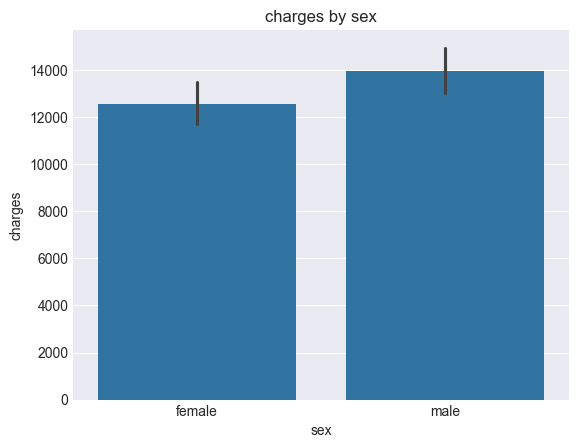

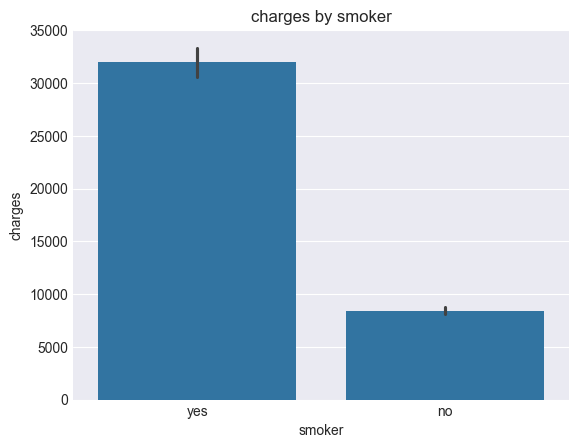

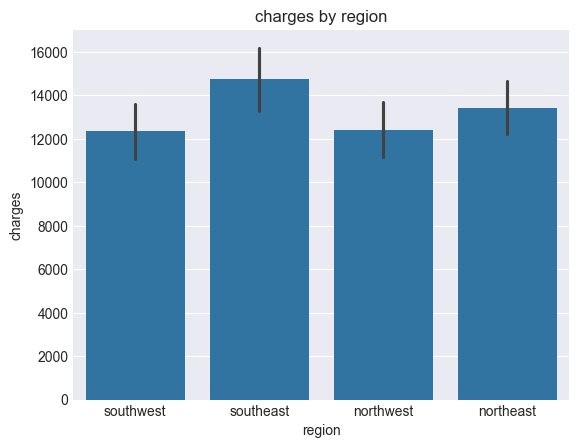

In [50]:
categorical_columns = ['sex', 'smoker', 'region']

for column in categorical_columns:
    sns.barplot(data=df, x=column, y='charges')
    plt.title(f'charges by {column}')
    plt.show()


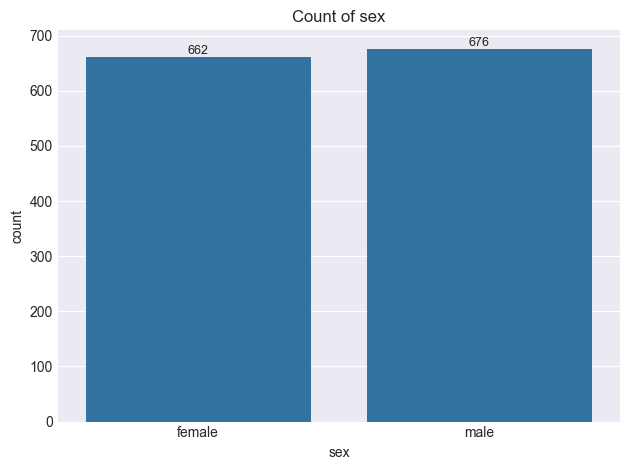

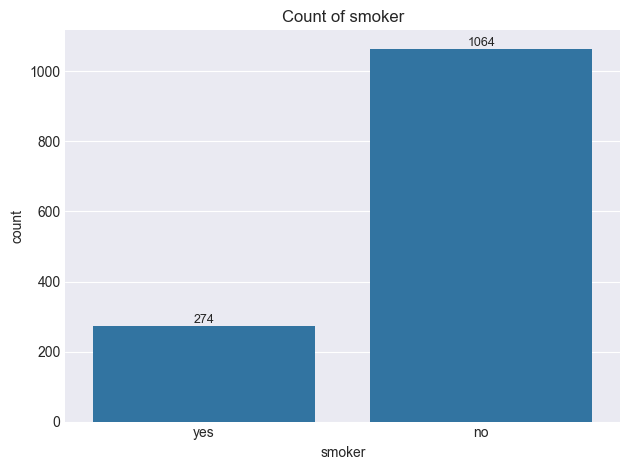

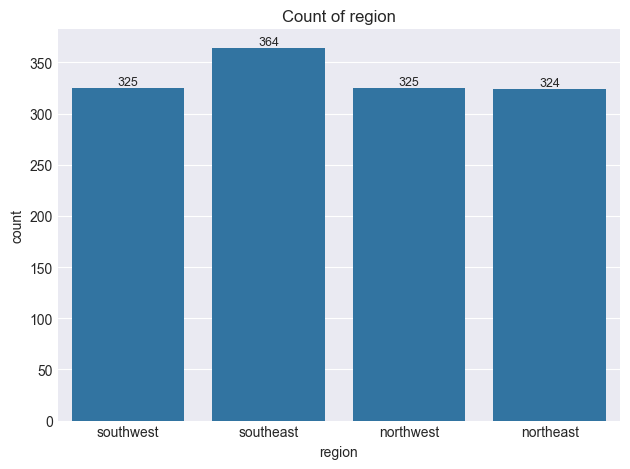

In [53]:
for column in categorical_columns:
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    for p in plt.gca().patches:
        plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()